In [ ]:
# Libraries for reading and handling the data
import numpy as np
import pandas as pd
import re

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn 

# Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Libraries for creating ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Library for Analysing the ML model
from sklearn import metrics

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


1.데이터 불러오기 (다중분류) 

**데이터준비하기**

In [ ]:
import pandas as pd

df2 = pd.read_csv('/content/호흡기2.csv')
df2

,Unnamed: 0,Symptoms,Age,Sex,Disease,Treatment
0,0,coughing,5.0,female,Asthma,Omalizumab
1,1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab
2,2,wheezing,6.0,male,Asthma,Mepolizumab
3,3,shortness of breath,7.0,male,Asthma,Mepolizumab
4,4,shortness of breath,9.0,male,Asthma,Mepolizumab
...,...,...,...,...,...,...
34404,38532,A cough that lasts more than three weeks,45.0,female,Tuberculosis,ethambutol
34405,38533,Loss of appetite and unintentional weight loss,43.0,female,Tuberculosis,ethambutol
34406,38534,Fever,41.0,female,Tuberculosis,ethambutol
34407,38535,Chills,53.0,female,Tuberculosis,ethambutol


In [ ]:
df2.drop(['Unnamed: 0'], axis = 1,inplace= True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34409 entries, 0 to 34408
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symptoms   34409 non-null  object 
 1   Age        34409 non-null  float64
 2   Sex        34409 non-null  object 
 3   Disease    34409 non-null  object 
 4   Treatment  34409 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
df2.head()

,Symptoms,Age,Sex,Disease,Treatment
0,coughing,5.0,female,Asthma,Omalizumab
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab
2,wheezing,6.0,male,Asthma,Mepolizumab
3,shortness of breath,7.0,male,Asthma,Mepolizumab
4,shortness of breath,9.0,male,Asthma,Mepolizumab


**전처리 과정** 

In [ ]:
df2.dropna(subset=['Symptoms','Age','Sex','Disease','Treatment'], axis =0, inplace=True) #각 컬럼에 데이터값 널 값을제거  Index: 34409 값이랑 각 컬럼이 같으면 좋은 데이터 
df2.head()

,Symptoms,Age,Sex,Disease,Treatment
0,coughing,5.0,female,Asthma,Omalizumab
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab
2,wheezing,6.0,male,Asthma,Mepolizumab
3,shortness of breath,7.0,male,Asthma,Mepolizumab
4,shortness of breath,9.0,male,Asthma,Mepolizumab


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34409 entries, 0 to 34408
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symptoms   34409 non-null  object 
 1   Age        34409 non-null  float64
 2   Sex        34409 non-null  object 
 3   Disease    34409 non-null  object 
 4   Treatment  34409 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


성별 원핫코딩

In [ ]:
df2['Sex'].replace('not to say',np.nan, inplace =True) # 자기 성별을 말안하겠다 가 존재 그것을 널 값으로 만들어줌 
df2.head()

,Symptoms,Age,Sex,Disease,Treatment
0,coughing,5.0,female,Asthma,Omalizumab
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab
2,wheezing,6.0,male,Asthma,Mepolizumab
3,shortness of breath,7.0,male,Asthma,Mepolizumab
4,shortness of breath,9.0,male,Asthma,Mepolizumab


In [ ]:
df2.dropna(subset=['Sex'], axis =0, inplace=True) # 널 값을 지워주면 not to say 행이 지워짐
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33749 entries, 0 to 34408
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symptoms   33749 non-null  object 
 1   Age        33749 non-null  float64
 2   Sex        33749 non-null  object 
 3   Disease    33749 non-null  object 
 4   Treatment  33749 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
onehot_sex = pd.get_dummies(df2[['Sex']]) #dummies 코드를 사용하여 성별을 원핫 코드 형식으로 바꿔줌
onehot_sex

,Sex_female,Sex_male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
34404,1,0
34405,1,0
34406,1,0
34407,1,0


In [ ]:
df2 = pd.concat([df2, onehot_sex], axis = 1) #concat 데이터 프레임을 추가 해준다. 원핫 코드을 사용하여 Sex_female	Sex_male두개의 컬럼을 추가 하고 female 1,0 male 0,1
df2.head()

,Symptoms,Age,Sex,Disease,Treatment,Sex_female,Sex_male
0,coughing,5.0,female,Asthma,Omalizumab,1,0
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab,1,0
2,wheezing,6.0,male,Asthma,Mepolizumab,0,1
3,shortness of breath,7.0,male,Asthma,Mepolizumab,0,1
4,shortness of breath,9.0,male,Asthma,Mepolizumab,0,1


**증상 원핫 코드**

In [ ]:
onehot_symptoms = pd.get_dummies(df2[['Symptoms']]) #dummies 코드를 사용하여 증상을 원핫 코드 형식으로 바꿔줌
onehot_symptoms.info()

In [ ]:
df2 = pd.concat([df2, onehot_symptoms], axis = 1) 

In [ ]:
df2.Symptoms.unique() # 컬럼 값 확인 

array(['coughing', 'tight feeling in the chest', 'wheezing',
       'shortness of breath', 'fever', 'cold', 'allergy',
       'coughingup yellow or green mucus daily',
       'shortness of breath that gets worse during flare-ups',
       'fatigue, feeling run-down or tired', 'Chest pain',
       'whistling sound while you breathe', 'coughingup blood',
       'runny nose', 'stuffy nose', 'loss of appetite', 'cough',
       'Runny nose', 'Low-grade fever', 'Chest congestion',
       'whistling sound while breathing', 'yellow cough',
       'Feeling run-down or tired', 'mucus', 'chest pain',
       'chronic cough', 'fatigue', 'lower back pain', 'dry cough',
       'greenish cough', 'cough with blood', 'Fever', 'sweating',
       'shaking', 'Rapid breathing', 'shallow breathing', 'low energy',
       'Loss of appetite', 'Nausea', 'vomiting', 'sharp chest pain',
       'Bluish skin', 'Rapid heartbeat', 'Rapid heartbeatz', 'high fever',
       'Headache', 'muscle aches', 'joint pain', 'Chill

**질병 원핫 인코딩**

In [ ]:
onehot_dummies = pd.get_dummies(df2[['Disease']]) #dummies 코드를 사용하여 증상을 원핫 코드 형식으로 바꿔줌
onehot_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33749 entries, 0 to 34408
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Disease_Acute Respiratory Distress Syndrome    33749 non-null  uint8
 1   Disease_Asbestosis                             33749 non-null  uint8
 2   Disease_Aspergillosis                          33749 non-null  uint8
 3   Disease_Asthma                                 33749 non-null  uint8
 4   Disease_Bronchiectasis                         33749 non-null  uint8
 5   Disease_Chronic Bronchitis                     33749 non-null  uint8
 6   Disease_Influenza                              33749 non-null  uint8
 7   Disease_Mesothelioma                           33749 non-null  uint8
 8   Disease_Pneumonia                              33749 non-null  uint8
 9   Disease_Pneumothorax                           33749 non-null  uint8
 10

In [ ]:
df2 = pd.concat([df2, onehot_dummies], axis = 1) #concat 데이터 프레임을 추가 해준다. 원핫 코드을 사용하여 Sex_female	Sex_male두개의 컬럼을 추가 하고 female 1,0 male 0,1
df2.head()

,Symptoms,Age,Sex,Disease,Treatment,Sex_female,Sex_male,Symptoms_A cough that lasts more than three weeks,"Symptoms_A dry, crackling sound in the lungs while breathing in",Symptoms_Bluish skin,Symptoms_Chest congestion,Symptoms_Chest pain,Symptoms_Chills,Symptoms_Daytime sleepiness,Symptoms_Difficulties with memory and concentration,Symptoms_Dry mouth,Symptoms_Feeling run-down or tired,Symptoms_Fever,Symptoms_Frequently waking,Symptoms_Headache,Symptoms_Loss of appetite,Symptoms_Loss of appetite and unintentional weight loss,Symptoms_Low-grade fever,Symptoms_Morning headaches,Symptoms_Nasal congestion,Symptoms_Nausea,Symptoms_Night sweats,Symptoms_Pauses in breathing,Symptoms_Persistent dry coug,Symptoms_Persistent dry cough,Symptoms_Rapid breathing,Symptoms_Rapid heartbeat,Symptoms_Rapid heartbeatz,Symptoms_Runny nose,Symptoms_Snoring,Symptoms_Sore throat,Symptoms_Unusual moodiness,Symptoms_Weight loss from loss of appetite,Symptoms_Wider and rounder than normal fingertips and toes,Symptoms_allergy,...,Symptoms_lower back pain,Symptoms_mucus,Symptoms_muscle aches,Symptoms_nausea,Symptoms_pain,Symptoms_runny nose,Symptoms_shaking,Symptoms_shallow breathing,Symptoms_sharp chest pain,Symptoms_short of breath,"Symptoms_short, shallow and rapid breathing",Symptoms_shortness of breath,Symptoms_shortness of breath that gets worse during flare-ups,Symptoms_stuffy nose,Symptoms_sweating,Symptoms_tight feeling in the chest,Symptoms_vomiting,Symptoms_weight loss,Symptoms_wheezing,Symptoms_wheezing cough,Symptoms_whistling sound while breathing,Symptoms_whistling sound while you breathe,Symptoms_yellow cough,Disease_Acute Respiratory Distress Syndrome,Disease_Asbestosis,Disease_Aspergillosis,Disease_Asthma,Disease_Bronchiectasis,Disease_Chronic Bronchitis,Disease_Influenza,Disease_Mesothelioma,Disease_Pneumonia,Disease_Pneumothorax,Disease_Pulmonary hypertension,Disease_Respiratory syncytial virus,Disease_Tuberculosis,Disease_bronchiolitis,Disease_bronchitis,Disease_chronic obstructive pulmonary disease,Disease_sleep apnea
0,coughing,5.0,female,Asthma,Omalizumab,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,wheezing,6.0,male,Asthma,Mepolizumab,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,shortness of breath,7.0,male,Asthma,Mepolizumab,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,shortness of breath,9.0,male,Asthma,Mepolizumab,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2.head()

,Symptoms,Age,Sex,Disease,Treatment,Sex_female,Sex_male,Symptoms_A cough that lasts more than three weeks,"Symptoms_A dry, crackling sound in the lungs while breathing in",Symptoms_Bluish skin,Symptoms_Chest congestion,Symptoms_Chest pain,Symptoms_Chills,Symptoms_Daytime sleepiness,Symptoms_Difficulties with memory and concentration,Symptoms_Dry mouth,Symptoms_Feeling run-down or tired,Symptoms_Fever,Symptoms_Frequently waking,Symptoms_Headache,Symptoms_Loss of appetite,Symptoms_Loss of appetite and unintentional weight loss,Symptoms_Low-grade fever,Symptoms_Morning headaches,Symptoms_Nasal congestion,Symptoms_Nausea,Symptoms_Night sweats,Symptoms_Pauses in breathing,Symptoms_Persistent dry coug,Symptoms_Persistent dry cough,Symptoms_Rapid breathing,Symptoms_Rapid heartbeat,Symptoms_Rapid heartbeatz,Symptoms_Runny nose,Symptoms_Snoring,Symptoms_Sore throat,Symptoms_Unusual moodiness,Symptoms_Weight loss from loss of appetite,Symptoms_Wider and rounder than normal fingertips and toes,Symptoms_allergy,...,Symptoms_lower back pain,Symptoms_mucus,Symptoms_muscle aches,Symptoms_nausea,Symptoms_pain,Symptoms_runny nose,Symptoms_shaking,Symptoms_shallow breathing,Symptoms_sharp chest pain,Symptoms_short of breath,"Symptoms_short, shallow and rapid breathing",Symptoms_shortness of breath,Symptoms_shortness of breath that gets worse during flare-ups,Symptoms_stuffy nose,Symptoms_sweating,Symptoms_tight feeling in the chest,Symptoms_vomiting,Symptoms_weight loss,Symptoms_wheezing,Symptoms_wheezing cough,Symptoms_whistling sound while breathing,Symptoms_whistling sound while you breathe,Symptoms_yellow cough,Disease_Acute Respiratory Distress Syndrome,Disease_Asbestosis,Disease_Aspergillosis,Disease_Asthma,Disease_Bronchiectasis,Disease_Chronic Bronchitis,Disease_Influenza,Disease_Mesothelioma,Disease_Pneumonia,Disease_Pneumothorax,Disease_Pulmonary hypertension,Disease_Respiratory syncytial virus,Disease_Tuberculosis,Disease_bronchiolitis,Disease_bronchitis,Disease_chronic obstructive pulmonary disease,Disease_sleep apnea
0,coughing,5.0,female,Asthma,Omalizumab,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,wheezing,6.0,male,Asthma,Mepolizumab,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,shortness of breath,7.0,male,Asthma,Mepolizumab,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,shortness of breath,9.0,male,Asthma,Mepolizumab,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


약에 대한 정보를 

In [ ]:
from sklearn import preprocessing    

label_encoder = preprocessing.LabelEncoder()     # label encoder 생성 문자를 숫자 형식으로 바꿈 이유는 나는 문자열이기 때문에 
                                                                            #숫자형을로 변경하여 문제지와 정답지 비교 
onehot_location = label_encoder.fit_transform(df2['Treatment'])

In [ ]:
onehot_location.max() 

32

In [ ]:
df2['y_label'] = onehot_location

In [ ]:
df2.head()

,Symptoms,Age,Sex,Disease,Treatment,Sex_female,Sex_male,Symptoms_A cough that lasts more than three weeks,"Symptoms_A dry, crackling sound in the lungs while breathing in",Symptoms_Bluish skin,Symptoms_Chest congestion,Symptoms_Chest pain,Symptoms_Chills,Symptoms_Daytime sleepiness,Symptoms_Difficulties with memory and concentration,Symptoms_Dry mouth,Symptoms_Feeling run-down or tired,Symptoms_Fever,Symptoms_Frequently waking,Symptoms_Headache,Symptoms_Loss of appetite,Symptoms_Loss of appetite and unintentional weight loss,Symptoms_Low-grade fever,Symptoms_Morning headaches,Symptoms_Nasal congestion,Symptoms_Nausea,Symptoms_Night sweats,Symptoms_Pauses in breathing,Symptoms_Persistent dry coug,Symptoms_Persistent dry cough,Symptoms_Rapid breathing,Symptoms_Rapid heartbeat,Symptoms_Rapid heartbeatz,Symptoms_Runny nose,Symptoms_Snoring,Symptoms_Sore throat,Symptoms_Unusual moodiness,Symptoms_Weight loss from loss of appetite,Symptoms_Wider and rounder than normal fingertips and toes,Symptoms_allergy,...,Symptoms_mucus,Symptoms_muscle aches,Symptoms_nausea,Symptoms_pain,Symptoms_runny nose,Symptoms_shaking,Symptoms_shallow breathing,Symptoms_sharp chest pain,Symptoms_short of breath,"Symptoms_short, shallow and rapid breathing",Symptoms_shortness of breath,Symptoms_shortness of breath that gets worse during flare-ups,Symptoms_stuffy nose,Symptoms_sweating,Symptoms_tight feeling in the chest,Symptoms_vomiting,Symptoms_weight loss,Symptoms_wheezing,Symptoms_wheezing cough,Symptoms_whistling sound while breathing,Symptoms_whistling sound while you breathe,Symptoms_yellow cough,Disease_Acute Respiratory Distress Syndrome,Disease_Asbestosis,Disease_Aspergillosis,Disease_Asthma,Disease_Bronchiectasis,Disease_Chronic Bronchitis,Disease_Influenza,Disease_Mesothelioma,Disease_Pneumonia,Disease_Pneumothorax,Disease_Pulmonary hypertension,Disease_Respiratory syncytial virus,Disease_Tuberculosis,Disease_bronchiolitis,Disease_bronchitis,Disease_chronic obstructive pulmonary disease,Disease_sleep apnea,y_label
0,coughing,5.0,female,Asthma,Omalizumab,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9
2,wheezing,6.0,male,Asthma,Mepolizumab,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9
3,shortness of breath,7.0,male,Asthma,Mepolizumab,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9
4,shortness of breath,9.0,male,Asthma,Mepolizumab,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [ ]:
df2[['Treatment', 'y_label']].to_csv('Treatment.csv')

**X 값 y값 설정**

In [ ]:
X= df2[['Age','Sex_female','Sex_male','Symptoms_wheezing','Symptoms_fatigue','Symptoms_shortness of breath','Symptoms_coughing','Symptoms_fatigue','Symptoms_low energy','Symptoms_shortness of breath','Symptoms_wheezing','Symptoms_A cough that lasts more than three weeks','Symptoms_A dry, crackling sound in the lungs while breathing in','Symptoms_Bluish skin','Symptoms_Chest congestion','Symptoms_Chest pain','Symptoms_Chills','Symptoms_Daytime sleepiness','Symptoms_Difficulties with memory and concentration','Symptoms_Dry mouth','Symptoms_fatigue, feeling run-down or tired','Symptoms_Feeling run-down or tired','Symptoms_Fever','Symptoms_Frequently waking','Symptoms_Headache','Symptoms_Loss of appetite','Symptoms_Loss of appetite and unintentional weight loss','Symptoms_Low-grade fever','Symptoms_Morning headaches','Symptoms_Nasal congestion','Symptoms_Nausea','Symptoms_Night sweats','Symptoms_Pauses in breathing','Symptoms_Persistent dry coug','Symptoms_Persistent dry cough','Symptoms_Rapid breathing','Symptoms_Rapid heartbeat','Symptoms_Runny nose','Symptoms_shortness of breath','Symptoms_shortness of breath that gets worse during flare-ups','Symptoms_Snoring','Symptoms_Sore throat','Symptoms_Unusual moodiness','Symptoms_Weight loss from loss of appetite','Symptoms_Wider and rounder than normal fingertips and toes','Symptoms_allergy','Symptoms_breath','Symptoms_chest pain','Symptoms_chronic cough','Symptoms_cold','Symptoms_cough','Symptoms_cough with blood','Symptoms_coughing','Symptoms_coughingup blood','Symptoms_coughingup yellow or green mucus daily','Symptoms_diarrhea','Symptoms_distressing','Symptoms_dizziness','Symptoms_dry cough','Symptoms_edema','Symptoms_fainting','Symptoms_faster heart beating','Symptoms_fatigue','Symptoms_fever', 'Symptoms_greenish cough','Symptoms_heart palpitations','Symptoms_high fever','Symptoms_irritability','Symptoms_joint pain','Symptoms_loss of appetite','Symptoms_lower back pain','Symptoms_mucus','Symptoms_muscle aches','Symptoms_nausea','Symptoms_pain','Symptoms_runny nose','Symptoms_shaking','Symptoms_shallow breathing','Symptoms_sharp chest pain','Symptoms_short of breath','Symptoms_short, shallow and rapid breathing','Symptoms_shortness of breath','Symptoms_stuffy nose','Symptoms_sweating','Symptoms_tight feeling in the chest','Symptoms_vomiting','Symptoms_weight loss','Symptoms_wheezing','Symptoms_wheezing cough','Symptoms_whistling sound while breathing','Symptoms_whistling sound while you breathe','Symptoms_yellow cough','Age','Sex_female','Sex_male','Disease_Acute Respiratory Distress Syndrome','Disease_Asbestosis','Disease_Aspergillosis','Disease_Asthma','Disease_Bronchiectasis','Disease_Chronic Bronchitis','Disease_Influenza','Disease_Mesothelioma','Disease_Pneumonia','Disease_Pneumothorax','Disease_Pulmonary hypertension','Disease_Respiratory syncytial virus','Disease_Tuberculosis','Disease_bronchiolitis','Disease_bronchitis','Disease_chronic obstructive pulmonary disease','Disease_sleep apnea']]
y = df2['y_label'] 



**데이터 정규화**

In [ ]:
# 설명 변수(데이터, 문제집) 정규화(normalization)...스케일 조정... 0~1 사이의 작은 값으로 축소 값이 일정 범위 안에 가둘라고 범위를 일반화 
# 머신이 공부 하기 쉽게요약집을 준다

from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
from tensorflow.keras.utils import  to_categorical

#각 데이터의 레이블 0~9 숫자 값을 범주형 형태로 변경

y = to_categorical(y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:

from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state=777) # 랜덤 추출 값

**데이터의 형태 확인하기**

In [ ]:
#훈련 데이터
print(X_train.shape,y_train.shape)
print(y_train)

#테스트 데이터
print(X_test.shape, y_test.shape)
print(y_test)

(22611, 112) (22611, 33)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(11138, 112) (11138, 33)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**검증데이터만들기**

In [ ]:
from sklearn.model_selection import  train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train,             # 독립 변수
                                                   y_train,            # 종속변수
                                                   test_size=0.33,     # 검증 33%
                                                   random_state=777)   # 랜덤 추출 값

In [ ]:
print(f'훈련 데이터 {X_train.shape} 레이블 {y_train.shape}') # 훈련 데이터를 나누어 검증터를 만듬 (15000개 ,컬럼수 )
print(f'검증 데이터 {X_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (15149, 112) 레이블 (15149, 33)
검증 데이터 (7462, 112) 레이블 (7462, 33)


In [ ]:
X

array([[-1.18133534,  1.16685741, -1.16685741, ..., -0.37654883,
        -0.3481264 , -0.15740895],
       [-1.21729968,  1.16685741, -1.16685741, ..., -0.37654883,
        -0.3481264 , -0.15740895],
       [-1.14537099, -0.85700274,  0.85700274, ..., -0.37654883,
        -0.3481264 , -0.15740895],
       ...,
       [ 0.11338109,  1.16685741, -1.16685741, ..., -0.37654883,
        -0.3481264 , -0.15740895],
       [ 0.54495323,  1.16685741, -1.16685741, ..., -0.37654883,
        -0.3481264 , -0.15740895],
       [ 0.90459669,  1.16685741, -1.16685741, ..., -0.37654883,
        -0.3481264 , -0.15740895]])

In [ ]:
import numpy as np
np.set_printoptions(suppress=True) # 리스트 안에 리스트 포장이 하나더 # 원하는 값만 추출하기 위해서

print(X_train[0])


[-1.18133534  1.16685741 -1.16685741 -0.25542532 -0.26611825 -0.29340216
 -0.0612163  -0.26611825 -0.12606967 -0.29340216 -0.25542532 -0.10027944
 -0.0654605  -0.08463011 -0.11493321 -0.07721029 -0.12011597 -0.05341014
 -0.05341014 -0.05341014 -0.09470416 -0.1317707  -0.14253502 -0.05341014
 -0.0654605  -0.09277411 -0.10027944 -0.14393539 -0.05341014 -0.0654605
 -0.13725063 -0.10027944 -0.05341014 -0.03773977 -0.02667655 -0.1317707
 -0.08445235 -0.10784409 -0.29340216 -0.08638813 -0.03773977 -0.0654605
 -0.05341014 -0.04623805 -0.03773977 -0.05451474 -0.07564131  3.91806836
 -0.16209064 -0.18242879 -0.17600006 -0.10027944 -0.0612163  -0.09063846
 -0.07219672 -0.0654605  -0.05341014 -0.08463011 -0.17546249 -0.08463011
 -0.08463011 -0.05341014 -0.26611825 -0.12448365 -0.10027944 -0.08463011
 -0.0654605  -0.05341014 -0.0654605  -0.11947975 -0.18389766 -0.18799116
 -0.0654605  -0.0654605  -0.03773977 -0.10514049 -0.09277411 -0.09277411
 -0.08463011 -0.0654605  -0.10027944 -0.29340216 -0.16

**데이터 형태확인**

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)
print(X_train.shape, X_val.shape)


(15149, 112) (15149, 33)
(11138, 112) (11138, 33)
(7462, 112) (7462, 33)
(15149, 112) (7462, 112)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (112, )))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(33,activation = 'softmax'))                                # 다중분류에서 가장 확률이 높은 하나 값만 가져오기위해서 'softmax' 사용 
                                                                                                     # y 값을 0~9 숫자 값을 범주형 형태로 변경 

In [ ]:
model.compile(loss='mae',
              optimizer = 'adam',
              metrics =['acc'] ) # 정확도

In [ ]:
history = model.fit(X_train,y_train,
                    epochs = 100,
                    validation_data =(X_val,y_val))

Epoch 1/100
474/474 [==============================] - 15s 4ms/step - loss: 0.0319 - acc: 0.5387 - val_loss: 0.0107 - val_acc: 0.8267
Epoch 2/100
474/474 [==============================] - 1s 2ms/step - loss: 0.0100 - acc: 0.8386 - val_loss: 0.0097 - val_acc: 0.8409
Epoch 3/100
474/474 [==============================] - 1s 2ms/step - loss: 0.0092 - acc: 0.8491 - val_loss: 0.0096 - val_acc: 0.8423
Epoch 4/100
474/474 [==============================] - 1s 2ms/step - loss: 0.0089 - acc: 0.8544 - val_loss: 0.0092 - val_acc: 0.8491
Epoch 5/100
474/474 [==============================] - 1s 3ms/step - loss: 0.0088 - acc: 0.8562 - val_loss: 0.0092 - val_acc: 0.8492
Epoch 6/100
474/474 [==============================] - 1s 2ms/step - loss: 0.0089 - acc: 0.8541 - val_loss: 0.0088 - val_acc: 0.8551
Epoch 7/100
474/474 [==============================] - 1s 2ms/step - loss: 0.0086 - acc: 0.8584 - val_loss: 0.0088 - val_acc: 0.8551
Epoch 8/100
474/474 [==============================] - 1s 2ms/step -

**학습결과 확인하기**

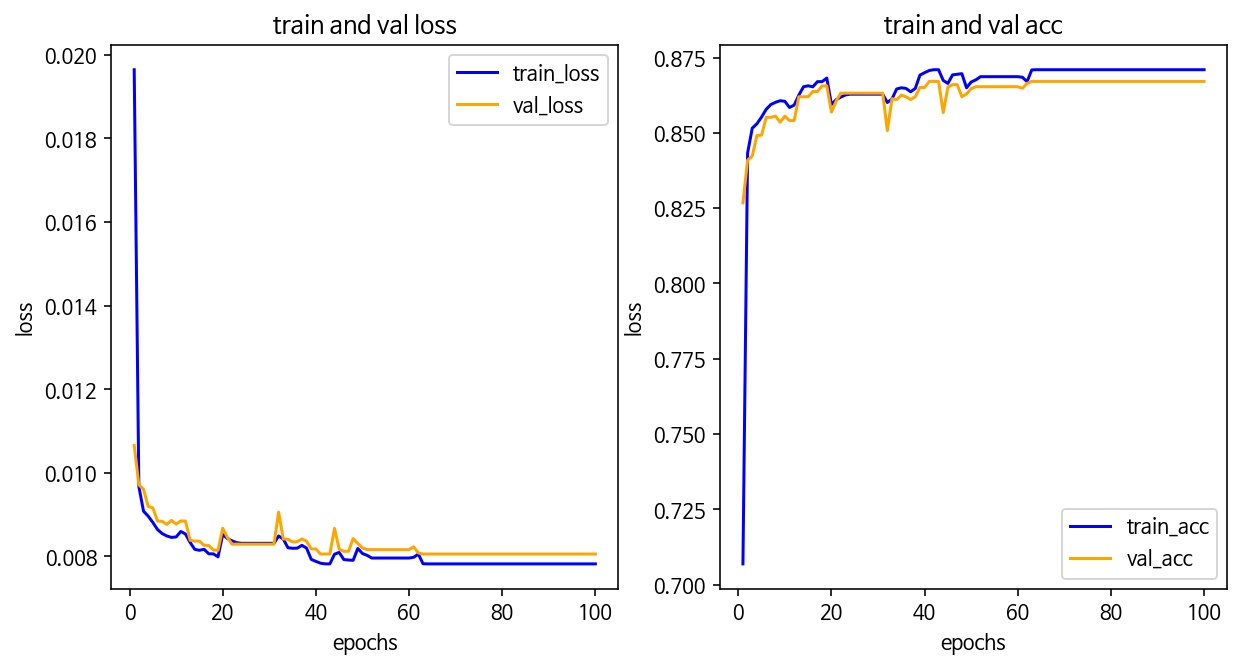

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show() # loss 값이 손실 값이고 정답률 높은데 오답률은 줄어들고 2 정확도가 

In [ ]:
import numpy as np
np.set_printoptions(suppress=True)                                # 얼마나 잘 예측 했는지를 확인 해야됨 # 레이블 33개 예측 힘듬 혼동 행렬을 그려서 각 레이블을 어떻게예측하는지 확인

results = model.predict(X_test)                                      # xtest 값대로 쭉 33개 정답개수  y_hat 만드는 작업 예측값
print(results.shape)
np.set_printoptions(precision=7)                                     # numpy 소수점 제한
print(f'각 클래스에 속할 확률 : \n{results[0]}')               #4번째 답의 속할 확률이 100% 0~ 11138계속 돈다. 리설트를 시각화 한거

(11138, 33)
각 클래스에 속할 확률 : 
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


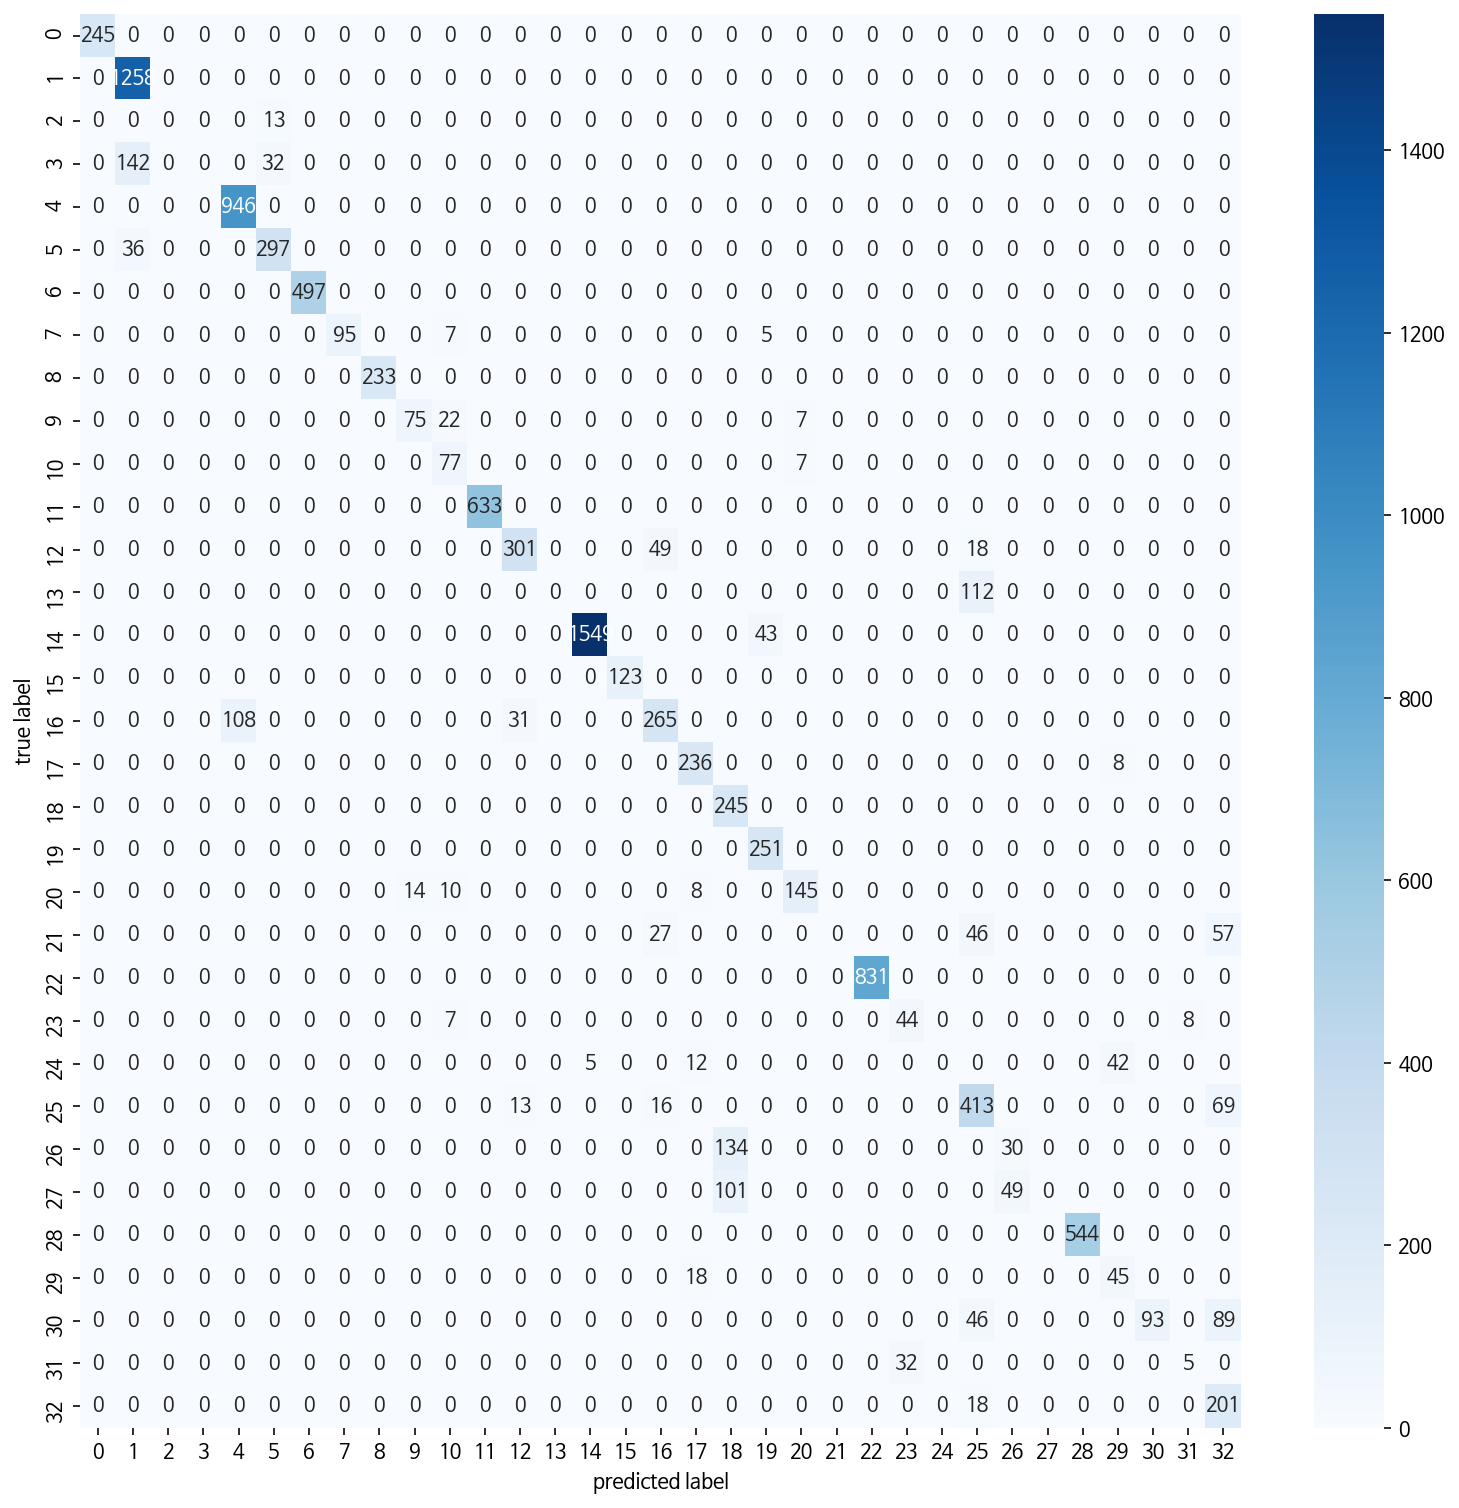

In [ ]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (13, 13))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))               # results np.argmax 33개 방중에 가장 높은 애를 가지고옴
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


In [ ]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       0.88      1.00      0.93      1258
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00       174
           4       0.90      1.00      0.95       946
           5       0.87      0.89      0.88       333
           6       1.00      1.00      1.00       497
           7       1.00      0.89      0.94       107
           8       1.00      1.00      1.00       233
           9       0.84      0.72      0.78       104
          10       0.63      0.92      0.74        84
          11       1.00      1.00      1.00       633
          12       0.87      0.82      0.84       368
          13       0.00      0.00      0.00       112
          14       1.00      0.97      0.98      1592
          15       1.00      1.00      1.00       123
          16       0.74      0.66      0.70       404
          17       0.86  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
